# Muestreo

## A lazo abierto
- Obtener la función de transferencia continua $G(s)$

In [1]:
pkg load control
G=zpk(-10,[-3 0],10)


Transfer function 'G' from input 'u1' to output ...

      10 s + 100
 y1:  ----------
      s^2 + 3 s 

Continuous-time model.


In [2]:
Tm = 0.19;

- Hallar la FT discreta de lazo abierto $G_D(s)$ del sistema de la figura con Z0H a la entrada y el tiempo de muestreo asignado $T_m$

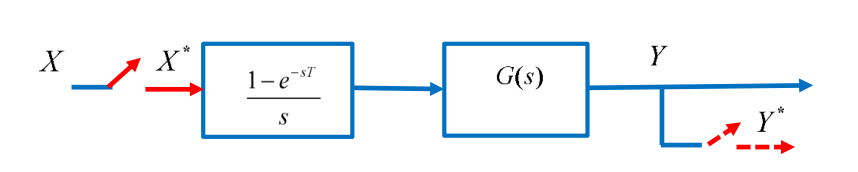

In [3]:
Gd=c2d(G,Tm,'zoh')


Transfer function 'Gd' from input 'u1' to output ...

         2.954 z - 0.2024   
 y1:  ----------------------
      z^2 - 1.566 z + 0.5655

Sampling time: 0.19 s
Discrete-time model.


- Dibujar el mapa de polos y ceros del sistema continuo y el discreto

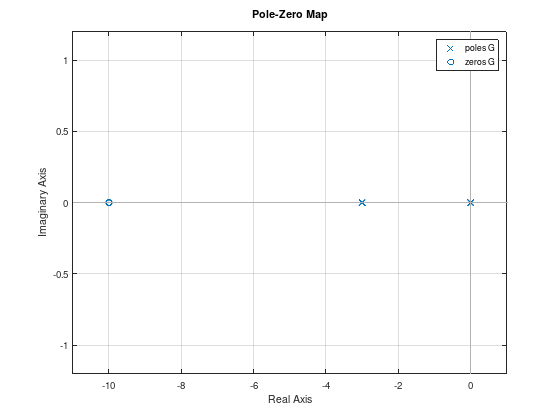

In [4]:
pzmap(G)

In [5]:
pole(G)

ans =

  -3
   0



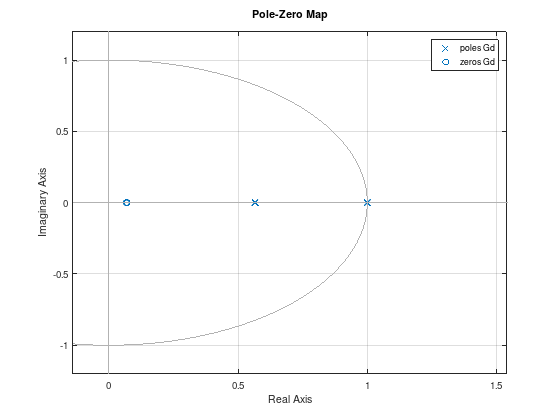

In [6]:
pzmap(Gd)

In [7]:
pole(Gd)

ans =

   1.0000
   0.5655



- ¿Qué ocurre con el mapa si se multiplica por 10 el periodo de muestreo?


Transfer function 'Gd1' from input 'u1' to output ...

           55.58 z + 7.54     
 y1:  ------------------------
      z^2 - 1.003 z + 0.003346

Sampling time: 1.9 s
Discrete-time model.


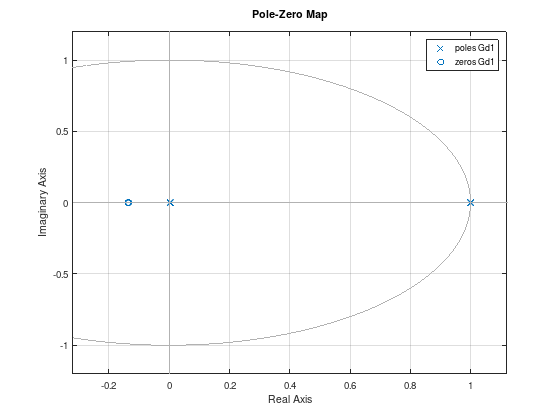

In [8]:
Gd1=c2d(G,10*Tm,'zoh'),pzmap(Gd1)

Se puede observar que al multiplicar 10 veces el tiempo de muestreo el segundo polo se acerca a un retardo puro más integrador. Esto significa que estamos submuestreando la señal.

- Obtener la respuesta al escalon del sistema discreto y determinar si es estable 

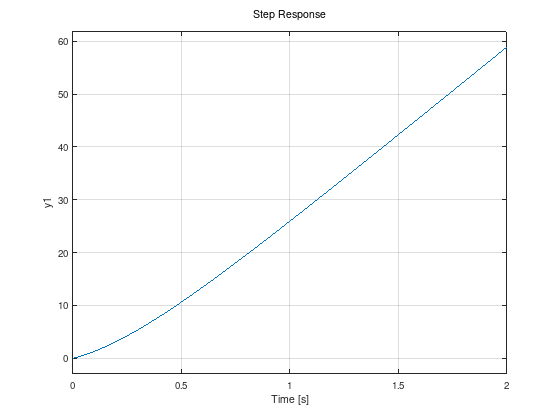

In [9]:
step(G)

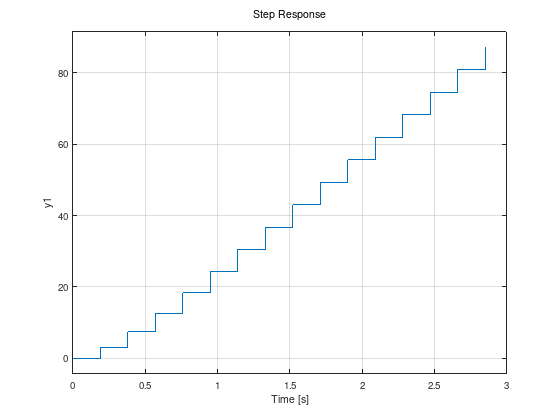

In [10]:
step(Gd)

Podemos observar que el sistema es inestable, lo cual es coincidente con el integrador puro en el sistema discreto.

## Sistema discreto
Examinando la función de lazo abierto llegamos a la conclusion de que el sistema Gd es de tipo 1, ya que tenemos un solo integrador puro.

In [11]:
Gd


Transfer function 'Gd' from input 'u1' to output ...

         2.954 z - 0.2024   
 y1:  ----------------------
      z^2 - 1.566 z + 0.5655

Sampling time: 0.19 s
Discrete-time model.


- Determinar la constante de error de posición Kp y el error ante un escalon y verificar mediante respuesta al escalon de lazo cerrado del sistema discreto como se muestra.

In [12]:
Kp=dcgain(Gd)

Kp = -2.4785e+16


In [13]:
F=feedback(Gd,1)


Transfer function 'F' from input 'u1' to output ...

         2.954 z - 0.2024   
 y1:  ----------------------
      z^2 + 1.389 z + 0.3631

Sampling time: 0.19 s
Discrete-time model.


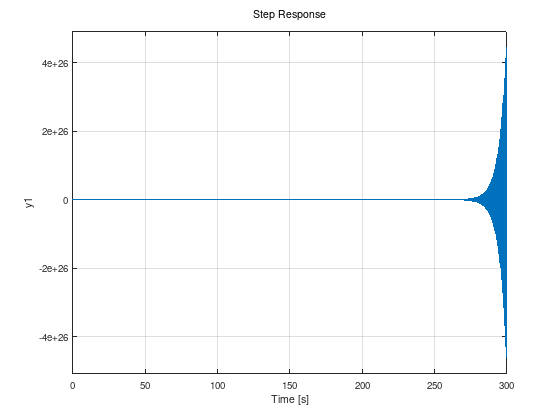

In [14]:
step(F,300)

El error debido a una entrada escalon es nulo, puesto que se cumple que Kp tiende al infinito (el sistema es tipo 1)

- Verificar error ante una rampa de entrada, ¿Converge o diverge? Explicar la causa

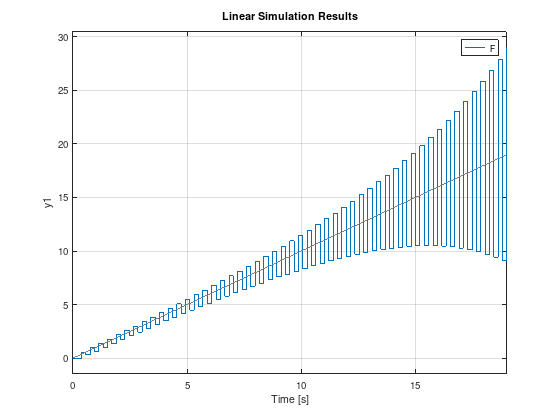

In [15]:
t=0:Tm:100*Tm; % genera rampa
lsim(F,t,t)

El sistema diverge, el error es creciente. Esto es debido al tipo de sistema. Para que exista convergencia ante una rampa de entrada el sistema debe ser tipo 2 o más

## A lazo cerrado con realimentación unitaria

- Graficar el lugar de raíces del sistema continuo G(s) y del discreto Gd(s) indicando las ganancias criticas de estabilidad (si las hubiera)

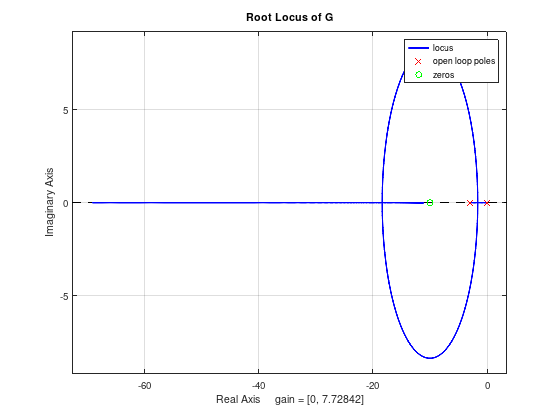

In [16]:
rlocus(G)

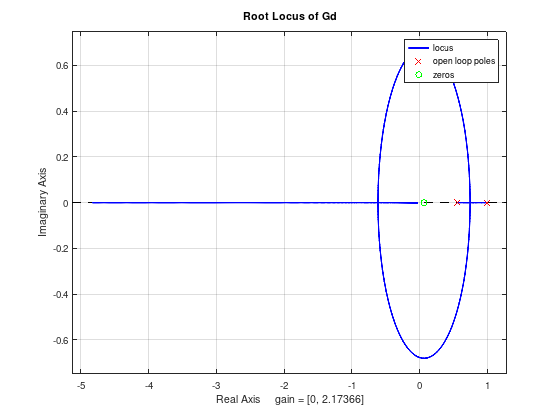

In [17]:
rlocus(Gd)

Para el sistema discreto, la ganancia crítica del sistema se reduce a K = 0.992

- ¿Que ocurre con la estabilidad relativa si se aumenta 10 veces el tiempo de muestreo original?

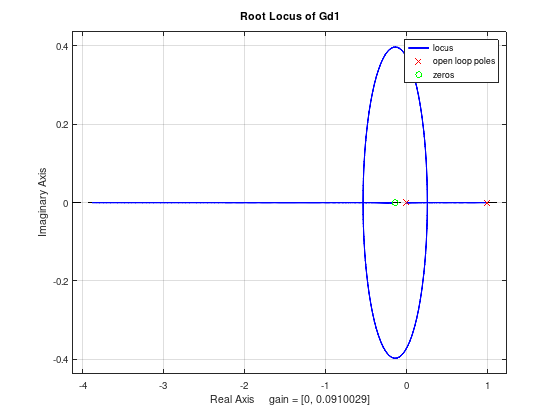

In [18]:
rlocus(Gd1)

Si el sistema se submuestrea, la ganancia crítica se reduce aún mas a K = 0.0418